In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
#example of PE file header data
import pefile
pe = pefile.PE('memtest.exe')
pe.print_info()

----------DOS_HEADER----------

[IMAGE_DOS_HEADER]
0x0        0x0   e_magic:                       0x5A4D    
0x2        0x2   e_cblp:                        0x90      
0x4        0x4   e_cp:                          0x3       
0x6        0x6   e_crlc:                        0x0       
0x8        0x8   e_cparhdr:                     0x4       
0xA        0xA   e_minalloc:                    0x0       
0xC        0xC   e_maxalloc:                    0xFFFF    
0xE        0xE   e_ss:                          0x0       
0x10       0x10  e_sp:                          0xB8      
0x12       0x12  e_csum:                        0x0       
0x14       0x14  e_ip:                          0x0       
0x16       0x16  e_cs:                          0x0       
0x18       0x18  e_lfarlc:                      0x40      
0x1A       0x1A  e_ovno:                        0x0       
0x1C       0x1C  e_res:                         
0x24       0x24  e_oemid:                       0x0       
0x26       0x26

In [3]:
#Reading CSV of PE Header file features, containing Malware and  none Malware PE
df = pd.read_csv("MalwareData1.csv" , sep="|")

In [4]:
#checking Shape
df.shape

(138047, 57)

In [5]:
#checking header
df.head(20)

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
5,airappinstaller.exe,e6e5a0ab3b1a27127c5c4a29b237d823,332,224,258,9,0,512,46592,0,...,10,4.843545,2.718577,7.965023,3858.600000,104,14671,0,16,1
6,AcroBroker.exe,dd7d901720f71e7e4f5fb13ec973d8e9,332,224,290,9,0,222720,67072,0,...,7,3.892779,1.346314,5.232167,1629.142857,52,8648,72,16,1
7,AcroRd32.exe,540c61844ccd78c121c3ef48f3a34f0e,332,224,290,9,0,823808,650240,0,...,29,4.102636,1.664392,6.373890,11939.689655,94,270376,72,15,1
8,AcroRd32Info.exe,9afe3c62668f55b8433cde602258236e,332,224,290,9,0,4096,7168,0,...,4,5.097499,3.435993,5.929812,616.500000,94,1164,72,15,1
9,AcroTextExtractor.exe,ba621a96e44f6558c08cf25b40cb1bd4,332,224,290,9,0,29696,12800,0,...,2,4.235788,3.456169,5.015407,820.000000,716,924,72,15,1


In [6]:
df.legitimate.value_counts()

0    96724
1    41323
Name: legitimate, dtype: int64

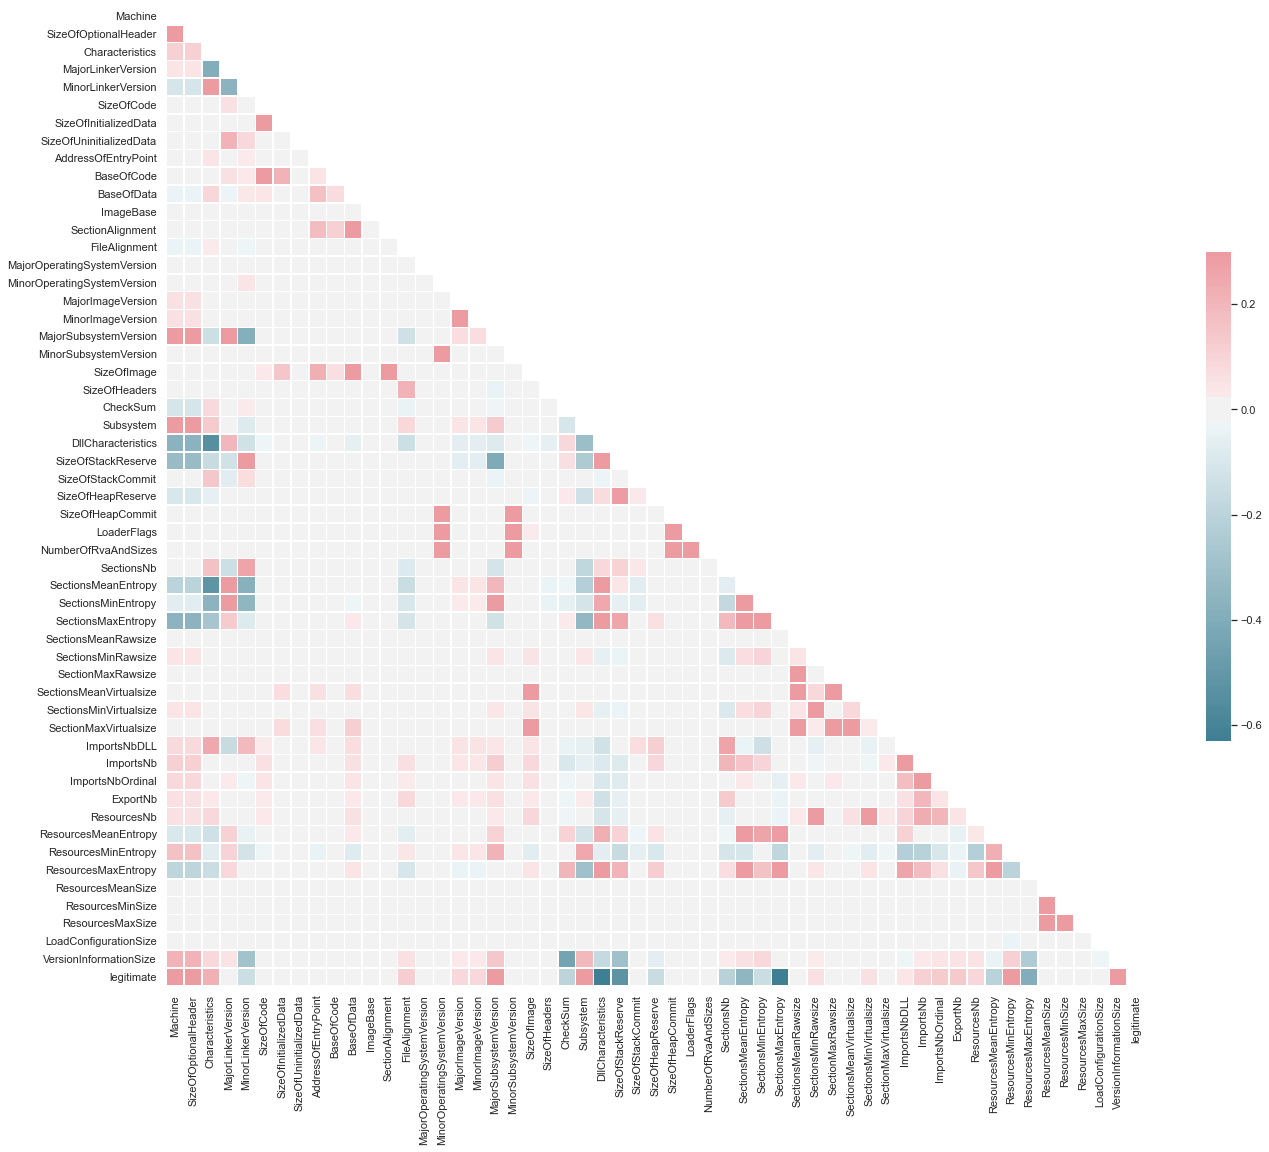

In [25]:
#looking at Corr matrix 
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
#increase display size 
pd.set_option("display.max_columns", 58)

In [28]:
#checking column name 
df.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [30]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 57 columns):
Name                           138047 non-null object
md5                            138047 non-null object
Machine                        138047 non-null int64
SizeOfOptionalHeader           138047 non-null int64
Characteristics                138047 non-null int64
MajorLinkerVersion             138047 non-null int64
MinorLinkerVersion             138047 non-null int64
SizeOfCode                     138047 non-null int64
SizeOfInitializedData          138047 non-null int64
SizeOfUninitializedData        138047 non-null int64
AddressOfEntryPoint            138047 non-null int64
BaseOfCode                     138047 non-null int64
BaseOfData                     138047 non-null int64
ImageBase                      138047 non-null float64
SectionAlignment               138047 non-null int64
FileAlignment                  138047 non-null int64
MajorOperatingSystemVersion    138047

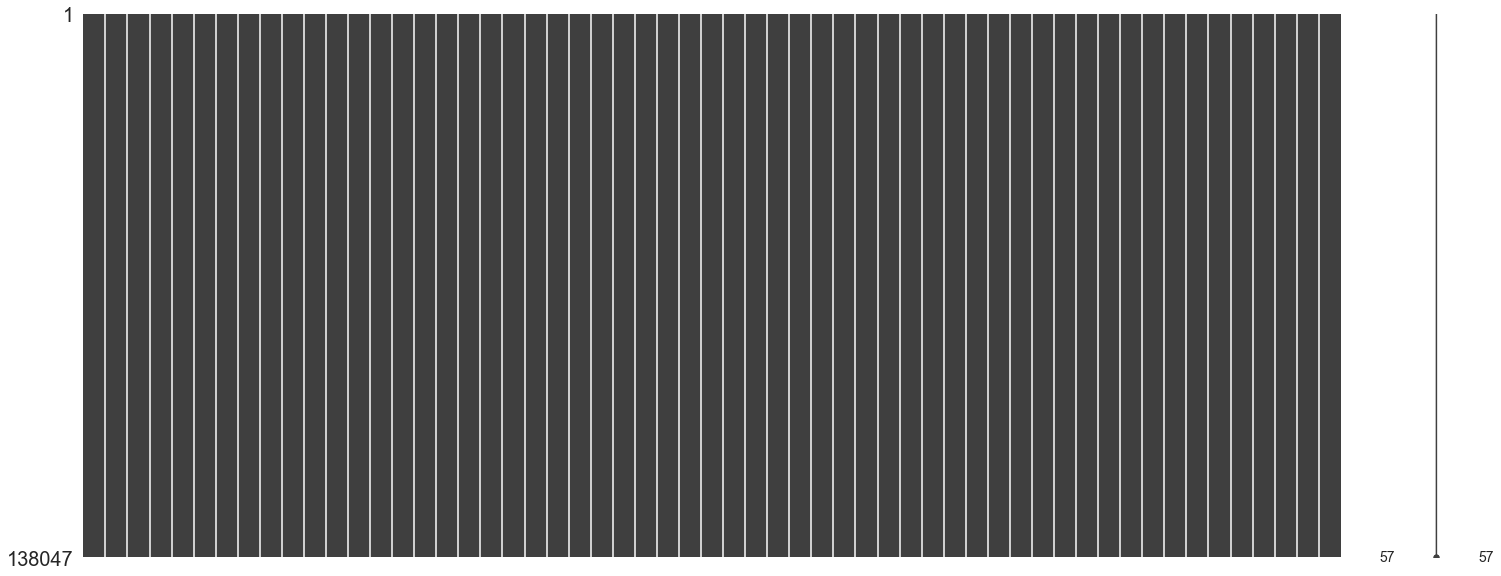

In [31]:
#checking nulls 
msno.matrix(df)

In [36]:
#checking for nulls
df.isnull().sum()

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

In [37]:
df['Machine'].value_counts()

332      122133
34404     15911
512           3
Name: Machine, dtype: int64

In [38]:
#drop columns and build X y dataframes
X=df.drop(columns=['legitimate', 'Name', 'md5'])
y=df['legitimate']

In [39]:
# checking shape
print ("X shape:", X.shape)
print ("y shape:", y.shape)

X shape: (138047, 54)
y shape: (138047,)


In [40]:
# fit model to training data to check feature importance
model = XGBClassifier()
model.fit(X, y)
#plot_importance(model)
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head(10)

,importance
ImageBase,0.458049
Subsystem,0.132643
VersionInformationSize,0.068751
MajorOperatingSystemVersion,0.042370
ResourcesMinSize,0.032397
SectionsMaxEntropy,0.027788
SectionsMinEntropy,0.020991
SizeOfStackReserve,0.018178
SectionsMinRawsize,0.013139
ResourcesMaxSize,0.011651


In [18]:
## Import the random forest model.
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X, y) 
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head(10)

,importance
ImageBase,0.146227
SizeOfStackReserve,0.111457
MinorImageVersion,0.074544
VersionInformationSize,0.068413
ResourcesMinSize,0.064075
Characteristics,0.058603
ExportNb,0.055728
Subsystem,0.053955
MajorOperatingSystemVersion,0.051738
ResourcesNb,0.034642


In [57]:
feature_importances.median()

importance    0.004379
dtype: float32

In [41]:
#Train and Test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
#Using Random Foreset Classifier to Select features 
randomtrees = RandomForestClassifier().fit(X,y)
select = SelectFromModel(randomtrees, prefit=True)
X_new = select.transform(X)
print(X.shape, X_new.shape)

#Train and Test split 
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())


(138047, 54) (138047, 14)
=== Confusion Matrix ===
[[28789   145]
 [   99 12382]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28934
           1       0.99      0.99      0.99     12481

    accuracy                           0.99     41415
   macro avg       0.99      0.99      0.99     41415
weighted avg       0.99      0.99      0.99     41415



=== All AUC Scores ===
[0.99936184 0.99991825 0.99975797 0.99849326 0.99530563 0.99929038
 0.99774075 0.99969691 0.99989024 0.99982746]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9989282697907852


In [59]:
#Using XGBClassifier to Select features 
xgb = XGBClassifier().fit(X,y)
select = SelectFromModel(xgb, prefit=True)
X_new = select.transform(X)
print(X.shape, X_new.shape)

#Train and Test split 
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# random forest model creation
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
# predictions
xgb_predict = xgb.predict(X_test)


xgb_cv_score = cross_val_score(xgb, X, y, cv=10, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, xgb_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, xgb_predict))
print('\n')
print("=== All AUC Scores ===")
print(xgb_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - XGboost: ", xgb_cv_score.mean())


(138047, 54) (138047, 7)
=== Confusion Matrix ===
[[28683   251]
 [  227 12254]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28934
           1       0.98      0.98      0.98     12481

    accuracy                           0.99     41415
   macro avg       0.99      0.99      0.99     41415
weighted avg       0.99      0.99      0.99     41415



=== All AUC Scores ===
[0.99877515 0.99959096 0.99968367 0.99853294 0.99814455 0.99877992
 0.99545209 0.9994587  0.99995926 0.99994423]


=== Mean AUC Score ===
Mean AUC Score - XGboost:  0.9988321492993462


In [32]:
#Using DecisionTreeClassifer to Select features 
dtc = DecisionTreeClassifier().fit(X,y)
select = SelectFromModel(dtc, prefit=True,threshold=1e-4)
X_new = select.transform(X)
print(X.shape, X_new.shape)

#Train and Test split 
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# random forest model creation
dtc.fit(X_train,y_train)
# predictions
dtc_predict = dtc.predict(X_test)

tc_cv_score = cross_val_score(dtc, X, y, cv=10, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, dtc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, dtc_predict))
print('\n')
print("=== All AUC Scores ===")
print(dtc_cv_score)
print('\n')d
print("=== Mean AUC Score ===")
print("Mean AUC Score - DecisionTree: ", dtc_cv_score.mean())


(138047, 54) (138047, 46)
=== Confusion Matrix ===
[[28736   198]
 [  151 12330]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28934
           1       0.98      0.99      0.99     12481

    accuracy                           0.99     41415
   macro avg       0.99      0.99      0.99     41415
weighted avg       0.99      0.99      0.99     41415



=== All AUC Scores ===
[0.95963507 0.99366492 0.99176445 0.97554851 0.8809024  0.97923159
 0.93219165 0.98553894 0.99729421 0.99685944]


=== Mean AUC Score ===
Mean AUC Score - DecisionTree:  0.9692631177271085


In [45]:
#file info using pe 

print("e_magic : " + hex(pe.DOS_HEADER.e_magic)) # Prints the e_magic field of the DOS_HEADER
print("Machine : " + hex(pe.FILE_HEADER.Machine))
# Check if it is a 32-bit or 64-bit binary
if hex(pe.FILE_HEADER.Machine) == '0x14c':
    print("This is a 32-bit binary")
else:
    print("This is a 64-bit binary")
print("TimeDateStamp : " + pe.FILE_HEADER.dump_dict()['TimeDateStamp']['Value'].split('[')[1][:-1]
)
print("NumberOfSections : " + hex(pe.FILE_HEADER.NumberOfSections))
print("Characteristics flags : " + hex(pe.FILE_HEADER.Characteristics))

print("Magic : " + hex(pe.OPTIONAL_HEADER.Magic))
# Check if it is a 32-bit or 64-bit binary
if hex(pe.OPTIONAL_HEADER.Magic) == '0x10b':
    print("This is a 32-bit binary")
elif hex(pe.OPTIONAL_HEADER.Magic) == '0x20b':
    print("This is a 64-bit binary")
print("ImageBase : " + hex(pe.OPTIONAL_HEADER.ImageBase))
print("SectionAlignment : " + hex(pe.OPTIONAL_HEADER.SectionAlignment))
print("FileAlignment : " + hex(pe.OPTIONAL_HEADER.FileAlignment))
print("SizeOfImage : " + hex(pe.OPTIONAL_HEADER.SizeOfImage))
print("DllCharacteristics flags : " + hex(pe.OPTIONAL_HEADER.DllCharacteristics))
print("DataDirectory: ")
print("*" * 50)
# print name, size and virtualaddress of every DATA_ENTRY in DATA_DIRECTORY
for entry in pe.OPTIONAL_HEADER.DATA_DIRECTORY:
  print(entry.name + "\n|\n|---- Size : " + str(entry.Size) + "\n|\n|---- VirutalAddress : " + hex(entry.VirtualAddress) + '\n')    
print("*" * 50)


e_magic : 0x5a4d
Machine : 0x14c
This is a 32-bit binary
TimeDateStamp : Tue Aug 27 23:54:02 2019 UTC
NumberOfSections : 0x7
Characteristics flags : 0x102
Magic : 0x10b
This is a 32-bit binary
ImageBase : 0x400000
SectionAlignment : 0x1000
FileAlignment : 0x200
SizeOfImage : 0x139000
DllCharacteristics flags : 0x400
DataDirectory: 
**************************************************
IMAGE_DIRECTORY_ENTRY_EXPORT
|
|---- Size : 52
|
|---- VirutalAddress : 0xe0720

IMAGE_DIRECTORY_ENTRY_IMPORT
|
|---- Size : 0
|
|---- VirutalAddress : 0x0

IMAGE_DIRECTORY_ENTRY_RESOURCE
|
|---- Size : 35868
|
|---- VirutalAddress : 0x12a000

IMAGE_DIRECTORY_ENTRY_EXCEPTION
|
|---- Size : 0
|
|---- VirutalAddress : 0x0

IMAGE_DIRECTORY_ENTRY_SECURITY
|
|---- Size : 8720
|
|---- VirutalAddress : 0xefa00

IMAGE_DIRECTORY_ENTRY_BASERELOC
|
|---- Size : 24548
|
|---- VirutalAddress : 0x133000

IMAGE_DIRECTORY_ENTRY_DEBUG
|
|---- Size : 84
|
|---- VirutalAddress : 0xe0080

IMAGE_DIRECTORY_ENTRY_COPYRIGHT
|
|----

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

